In [ ]:
# please, install before use
!pip install openpyxl


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Download last data available of T200
csv = pd.read_excel("../assets/thrusters.xlsx", sheet_name=None)

print(csv.keys())
# delete sheet without data
del csv['READ ME FIRST']

# Print the table
csv['10 V'].head()

dict_keys(['READ ME FIRST', '10 V', '12 V', '14 V', '16 V', '18 V', '20 V'])


,PWM (µs),RPM,Current (A),Voltage (V),Power (W),Force (Kg f),Efficiency (g/W)
0,1100,2662.12,13.616667,10,136.166667,-2.309539,16.961251
1,1104,2666.99,13.630000,10,136.300000,-2.304247,16.905703
2,1108,2660.54,13.450000,10,134.500000,-2.295176,17.064502
3,1112,2626.69,13.200000,10,132.000000,-2.281568,17.284604
4,1116,2617.22,12.810000,10,128.100000,-2.222601,17.350514


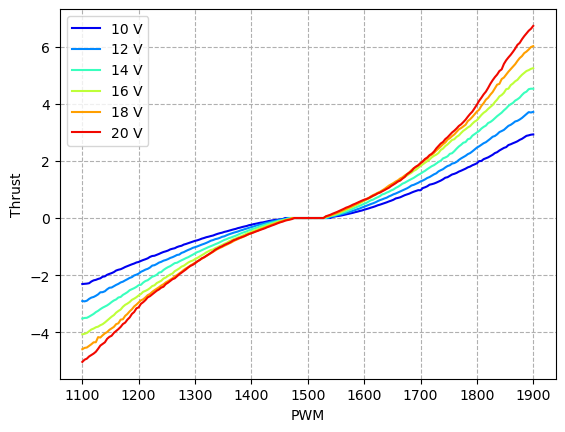

In [2]:
# define style
colors = plt.cm.jet(np.linspace(0.1,0.9,len(csv.keys())))
plt.rc('grid', linestyle="--")

def pwm2thrust(csv, alpha=1.0, colors=colors):
    i = 0
    for key in csv.keys():
        pwm = csv[key][' PWM (µs)'].values
        thrust = csv[key][' Force (Kg f)'].values
        plt.plot(pwm, thrust, label='%s'%key, color=colors[i], alpha=alpha)
        i += 1

    plt.ylabel('Thrust')
    plt.xlabel('PWM')
    plt.legend()
    plt.grid(True)

pwm2thrust(csv)

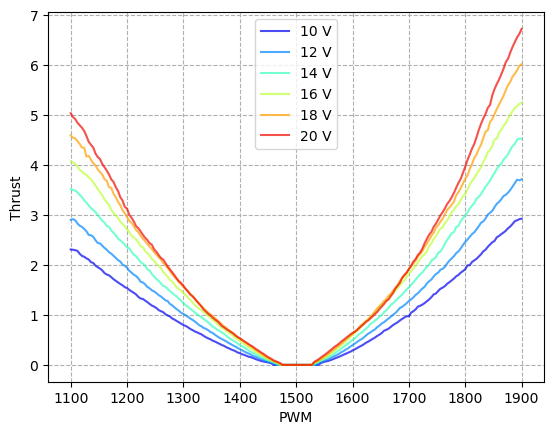

In [80]:
csv_mirror = csv.copy()
for key in csv_mirror.keys():
        pwm = csv[key][' PWM (µs)'].values
        thrust = csv[key][' Force (Kg f)'].values
        csv[key][' Force (Kg f)'] = abs(thrust)

pwm2thrust(csv_mirror, alpha=0.7)

### Approximation of original data

In [67]:
def get_line(key, csv, last=True):
  pwm = csv[key][' PWM (µs)'].values
  thrust = csv[key][' Force (Kg f)'].values

  # Define origin
  x_0 = 1500
  ind = np.where(pwm == x_0)[0][0]

  # Find coef
  if last:
    x, y = pwm[-1], thrust[-1]
    k = y/(x - x_0)
  else:
    x, y = pwm[0], thrust[0]
    k = -y/(x_0 - x)

  # Cut the range
  if last:
    pwm = pwm[ind:]
    thrust = thrust[ind:]
  else:
    pwm = pwm[:ind]
    thrust = thrust[:ind]

  # Plot the result
  fit = (pwm-1500)*k
  plt.plot(pwm, fit, label='fit')
  plt.plot(pwm, thrust, label='real')
  plt.ylabel('Thrust')
  plt.xlabel('PWM')
  plt.legend()
  plt.grid()
  plt.show()

  # Calcule RMS
  RMS = np.sqrt(((fit - pwm) ** 2).mean())
  # Less than 1 is good !
  print("RMS is {0}".format(RMS))
  return k

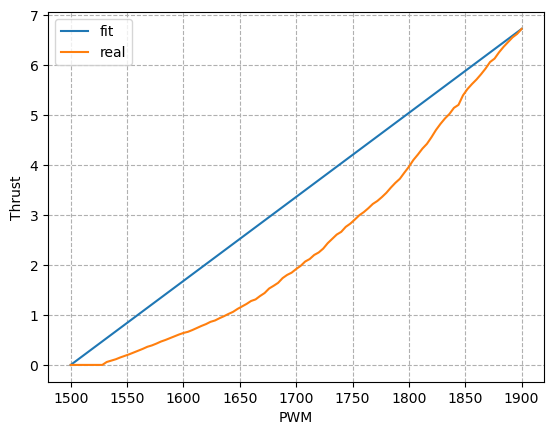

RMS is 1700.50881485501


0.0168055836

In [76]:
key = '20 V'
k_max = get_line(key, csv_mirror)
k_max

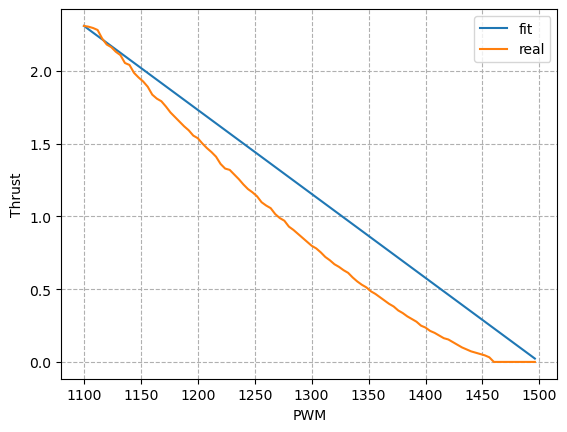

RMS is 1302.0230408287714


-0.0057738481666666655

In [77]:
key = '10 V'
k_min= get_line(key, csv_mirror, False)
k_min

(-2.0, 7.0)

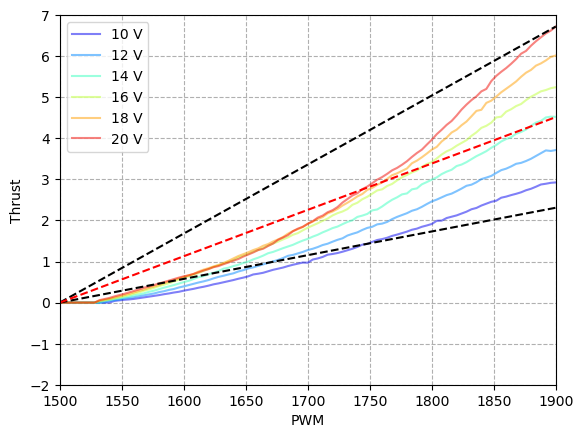

In [74]:
pwm2thrust(csv_mirror, alpha=0.5)

X_ORIGIN = 1500
X_MAX = 1900

x = np.arange(X_ORIGIN, X_MAX+10, 10)

y_min = -k_min*(x-X_ORIGIN)
plt.plot(x, y_min, '--k')

y_max = k_max*(x-X_ORIGIN)
plt.plot(x, y_max, '--k')

y_mean = (y_max + y_min)/2
plt.plot(x, y_mean, '--r')

plt.xlim(X_ORIGIN, X_MAX)
plt.ylim(-2, 7)

(-2.0, 7.0)

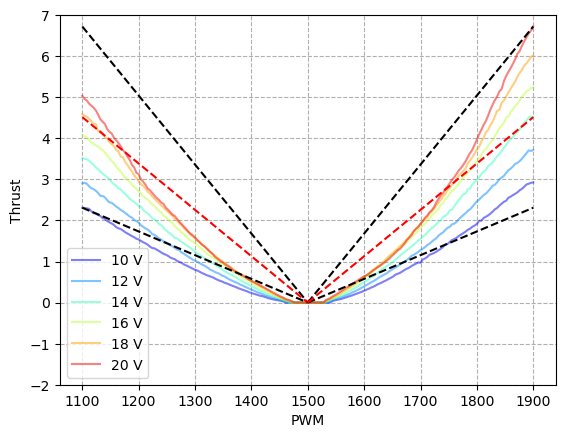

In [75]:
pwm2thrust(csv_mirror, alpha=0.5)

X_ORIGIN = 1500
X_MAX = 1900
X_MIN = 1100

x = np.arange(X_MIN, X_ORIGIN+10, 10)

y_min = k_min*(x-X_ORIGIN)
plt.plot(x, y_min, '--k')

y_max = -k_max*(x-X_ORIGIN)
plt.plot(x, y_max, '--k')

y_mean = (y_max + y_min)/2
plt.plot(x, y_mean, '--r')

x = np.arange(X_ORIGIN, X_MAX+10, 10)

y_min = -k_min*(x-X_ORIGIN)
plt.plot(x, y_min, '--k')

y_max = k_max*(x-X_ORIGIN)
plt.plot(x, y_max, '--k')

y_mean = (y_max + y_min)/2
plt.plot(x, y_mean, '--r')

plt.ylim(-2, 7)

### Normalized data

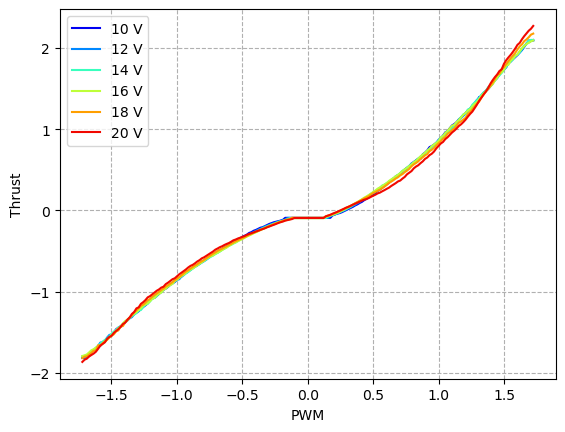

In [47]:
csv_norm = csv.copy()
for key in csv_norm.keys():
    pwm = csv_norm[key][' PWM (µs)']
    csv_norm[key][' PWM (µs)'] = (pwm - pwm.mean())/pwm.std()
    # csv_norm[key][' PWM (µs)'] = (pwm - pwm.min())/(pwm.max() - pwm.min())
    thrust = csv_norm[key][' Force (Kg f)'].values
    csv_norm[key][' Force (Kg f)'] = (thrust - thrust.mean())/thrust.std()
    # csv_norm[key][' Force (Kg f)'] = (thrust - thrust.min())/(thrust.max() - thrust.min())

pwm2thrust(csv_norm)

[ 1.38188524 -0.41510633]


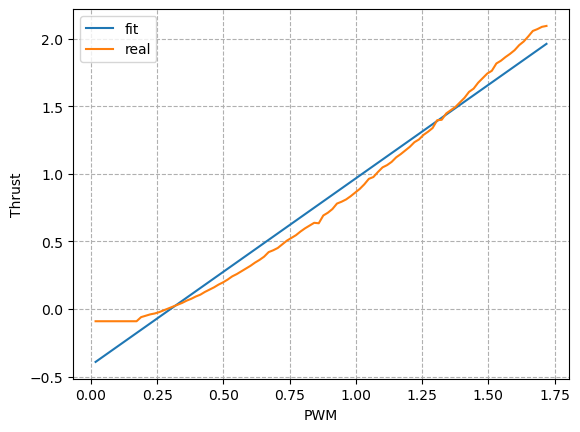

RMS is 0.20711731591673704
[ 1.41844842 -0.45890556]


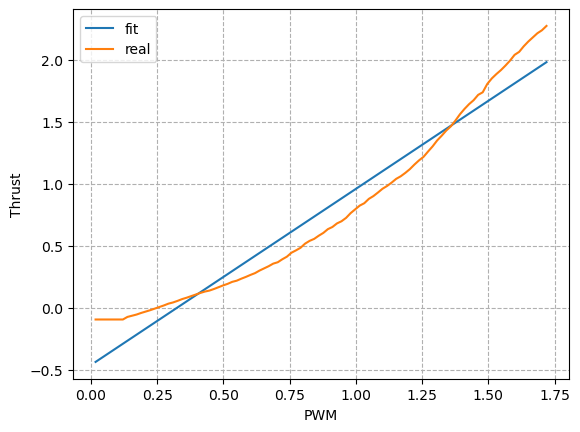

RMS is 0.22861379037391769


In [48]:
key = '10 V'
coefs_min = get_line(key, csv_norm)

key = '20 V'
coefs_max = get_line(key, csv_norm)

(-0.5, 2.5)

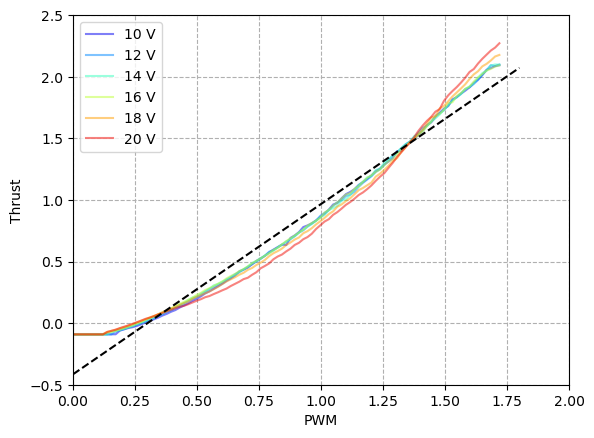

In [51]:
pwm2thrust(csv_norm, alpha=0.5)

x = np.arange(0.0, 2.0, 0.2)

y_min = coefs_min[0]*x + coefs_min[1]
plt.plot(x, y_min, '--k')

# y_max = coefs_max[0]*x + coefs_max[1]
# plt.plot(x, y_max, '--k')

plt.xlim(0, 2)
plt.ylim(-0.5, 2.5) 